In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Problem 1

In [3]:
print( 5.0302/150, -5.02233/150)
print( 4.3857/150, -3.81628/150)

0.033534666666666664 -0.033482200000000004
0.029238 -0.025441866666666667


# Problem 2

In [4]:
V_in = 25e-3/(10/49 + 1/4.7e3)
print(V_in)

0.12237242024272567


In [5]:
I_speaker = V_in*10/49
print(I_speaker**2 * 16)

0.009979181498417164


In [6]:
.25/16

0.015625

In [7]:
.2**2*(10-3.2)/.2/2/0.25

2.72

# Problem 7

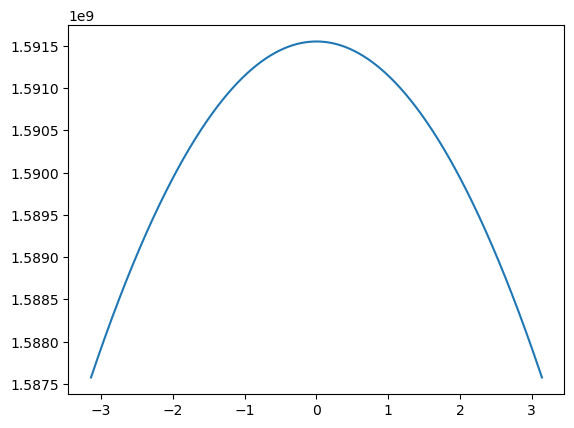

In [17]:
def transfer_function(w, R=1e3, C=1e-8, w_0=10*np.pi*2, a_0=5e5):
    Z = np.array([complex(0, w_i*C) for w_i in w])
    w_f = w_0*(1 + R/Z + a_0)/(1 + R/Z)
    norm_w = np.array([complex(0, w_i/w_f_i) for w_i, w_f_i in zip(w, w_f)])
    H = - (R/Z) / (1 + norm_w)
    return np.real(H), np.imag(H)

w = np.linspace(-np.pi, np.pi, 10000)
x, y = transfer_function(w)
plt.plot(w, x)

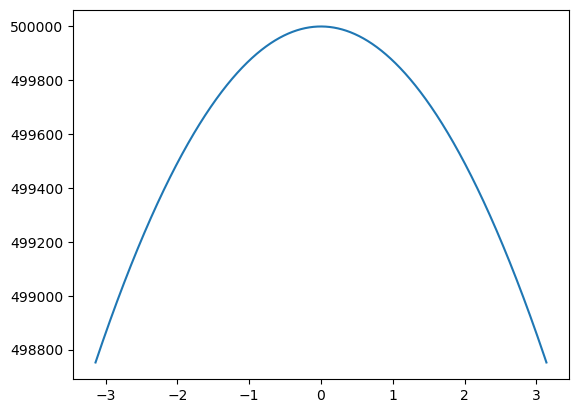

In [28]:
def op_amp_gain(w, w_0=20*np.pi, a_0=5e5):
    return a_0/(1 + 1j*w/w_0)
def beta(w, R=1e3, C=1e-8):
    Z = 1/(w*C*1j)
    return Z/(R+Z)

w = np.linspace(-np.pi, np.pi, 10000)
y = op_amp_gain(w)*beta(w)
plt.plot(w, np.real(y))

In [31]:
np.real(op_amp_gain(109e3*2*np.pi)*beta(109e3*2*np.pi))

-6.557970832291487

In [75]:
def transfer_function_opamp(w, w_0=20*np.pi, a_0=5e5):
    return a_0/(1 + 1j*w/w_0)

def total_transfer_function(w, w_0=20*np.pi, a_0=5e5, R=1e4, C=1e-8):
    Z = 1/(1j*w*C)
    w_f = w_0*(1 + R/Z + a_0)/(1 + R/Z)
    return -1j*w*R*C/(1 + 1j*w/w_f)
    
def total_transfer_function_2(w, w_0=20*np.pi, a_0=5e5, R_1=1e3, R_2=1e4, C_1=1e-8, C_2=47e-12):
    Z_1 = 1/(1j*w*C_1) + R_1
    Z_2 = 1/(1j*w*C_2 + 1/R_2)
    w_f = w_0*a_0/(1 + Z_2/Z_1) #w_0*(1 + Z_2/Z_1 + a_0)/(1 + Z_2/Z_1)
    return -Z_2/Z_1*(1 + 1j*w/w_f)

def phase(x):
    return np.arctan(np.imag(x)/np.real(x))
print(phase(transfer_function_opamp(109e3*2*np.pi)))
print(phase(total_transfer_function(109e3*2*np.pi)))
print(phase(total_transfer_function_2(109e3*2*np.pi)))


-1.570704583675888
-1.5261925478397464
0.04718669187510442


In [76]:
1/(2*4.5704e-6)

109399.6149133555

[5077270 7685506]
17708.526931356857 17.274496757334358 20.274500436603784
650315.630891827 17.274506302918088 20.274500436603784


Text(0, 0.5, 'Gain (dB)')

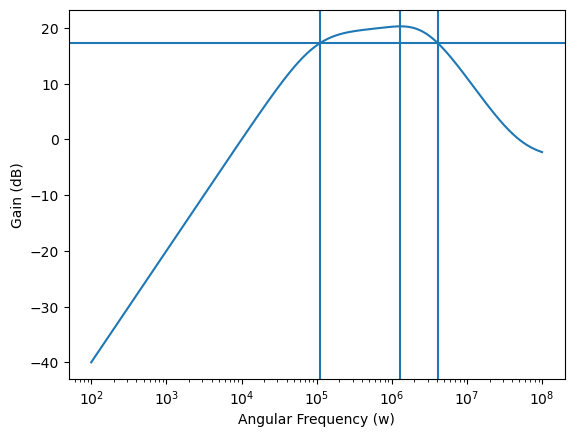

In [81]:
w = np.logspace(2, 8, 10000000)
gain_db = 20*np.log10(np.abs(total_transfer_function_2(w)))
gain_3db = np.max(gain_db) -3
idx = np.argwhere(np.diff(np.sign(gain_db - gain_3db))).flatten()
print(idx)
plt.plot(w, gain_db)
plt.axvline(w[np.argmax(gain_db)])
plt.axhline(max(gain_db)-3)
for i in idx:
    plt.axvline(w[i])
    print(w[i]/(2*np.pi), gain_db[i], max(gain_db))
plt.xscale('log')
plt.xlabel("Angular Frequency (w)")
plt.ylabel("Gain (dB)")

# Problem 8

In [84]:
print(12e-9/np.sqrt(2)*100*1000)
print(15e-9/np.sqrt(2)*100*1000)

0.000848528137423857
0.0010606601717798212


In [5]:
.83e-3*np.sqrt(8.32e3)

0.07570764822658275

In [7]:
1/100e3/2

5e-06

In [9]:
12.2/12

1.0166666666666666